In [2]:
import os
import glob
import numpy as np
import clima_anom as ca
import matplotlib.pyplot as plt
import matplotlib.cbook
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from netCDF4 import Dataset

In [5]:
data = ca.read_netcdf('/media/arturo/Arturo/Data/TRMM/3B42_v7_1dy/3B42_1998_12_2012_12_1dy_01x01.nc',2)
lat = data['lat']
lon = data['lon']
pre = data['prec']

lon2d, lat2d = np.meshgrid(lon, lat)
pre_mean = np.mean(pre,axis=0)

lat : (280,)
lon : (261,)
time : (5145,)
prec : (5145, 280, 261)


Text(0.0, 1.0, 'Mean')

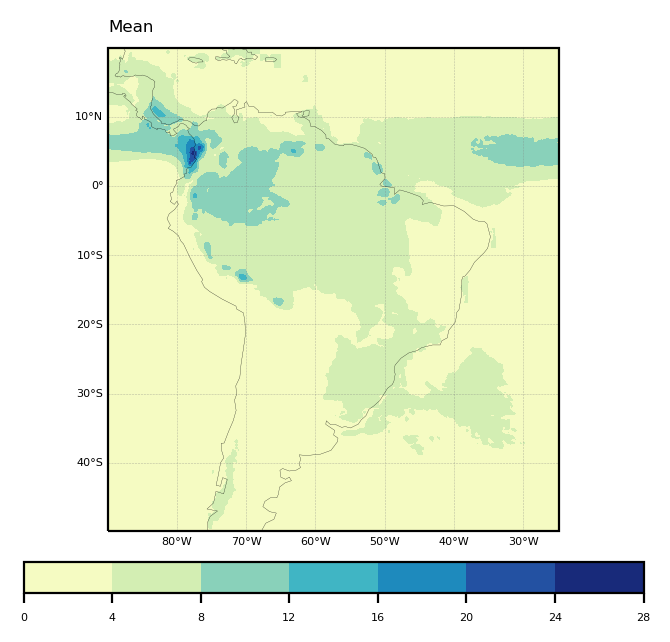

In [6]:
linewidth_shape = 0.2

levels = None

proj = ccrs.PlateCarree()
cmap = plt.cm.YlGnBu

fig = plt.figure(figsize=(4,4),dpi=200)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.1,color='black',zorder=4)
a1 = ax1.contourf(lon2d, lat2d,pre_mean,levels = levels, cmap=cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
cbar1 = plt.colorbar(a1,orientation='horizontal',pad=0.05)
cbar1.ax.tick_params(labelsize=4)
ax1.set_title('Mean',fontsize=6,loc='left')